# Importación modulos y datos

In [15]:
#data = pd.read_csv("merge_20220812.csv", low_memory=False) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv("../data/conchillas_orig.csv", low_memory=False) 

In [4]:
#data = pd.read_csv("Merge_20220730.csv", low_memory=False) 

# Exploración y limpieza de datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lote       1212 non-null   int64  
 1   Individuo  1212 non-null   int64  
 2   AE         1212 non-null   float64
 3   LE         1212 non-null   float64
 4   AT         1212 non-null   float64
 5   LT         1212 non-null   float64
 6   AA         1212 non-null   float64
 7   LA         1212 non-null   float64
 8   NV         1212 non-null   float64
 9   Morfotipo  1212 non-null   object 
 10  Labio      1212 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 104.3+ KB


In [4]:
data = data.dropna(subset=['Labio'])

In [5]:
data.iloc[:,2:].describe()

AE           LE           AT           LT           AA  \
count  1212.000000  1212.000000  1212.000000  1212.000000  1212.000000   
mean      6.121980     1.753333    13.009167     9.633936     7.578465   
std       0.976585     0.361939     1.931606     1.397661     1.215578   
min       3.180000     0.690000     7.920000     6.140000     4.710000   
25%       5.400000     1.490000    11.537500     8.677500     6.680000   
50%       6.110000     1.760000    12.840000     9.545000     7.480000   
75%       6.820000     2.010000    14.300000    10.670000     8.400000   
max       9.110000     3.160000    19.200000    14.540000    12.010000   

               LA           NV        Labio  
count  1212.00000  1212.000000  1212.000000  
mean      6.06250     5.119604     0.491749  
std       0.80903     0.300297     0.500138  
min       4.21000     4.020000     0.000000  
25%       5.47000     4.920000     0.000000  
50%       5.97000     5.160000     0.000000  
75%       6.58000     5.330000     1.000000  
max       8.86000     5.930000     1.000000

In [6]:
print(pd.value_counts(data["Morfotipo"], sort = True, normalize=True))

LU    0.858086
LB    0.135314
DU    0.006601
Name: Morfotipo, dtype: float64


In [7]:
print(pd.value_counts(data["Labio"], sort = True, normalize=True))

0    0.508251
1    0.491749
Name: Labio, dtype: float64


In [9]:
#data['cox1-lsu'].value_counts()

AA    68
HG     9
BA     3
GF     3
LA     3
GC     3
CA     2
GE     2
OA     2
DA     1
IG     1
GD     1
EA     1
AB     1
JH     1
KI     1
FA     1
MG     1
Name: cox1-lsu, dtype: int64

### Creación columnas nuevas

In [8]:
#Creamos un Filtro con NV > 4.75 y presencia de labio (divide adulto de joven???)
data["Filtro_NV"] = np.where(np.logical_or(data["NV"] > 4.75, data["Labio"] == 1),True,False)

In [9]:
print(pd.value_counts(data["Filtro_NV"], sort = True, normalize=True))

True     0.892739
False    0.107261
Name: Filtro_NV, dtype: float64


In [10]:
data["Ratio_AE_LE"] = data["AE"]/data["LE"]
data["Ratio_AA_LA"] = data["AA"]/data["LA"]
data["Ratio_AT_LT"] = data["AT"]/data["LT"]

#aux copy: 'Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'

In [11]:
data.head()

Lote  Individuo    AE    LE     AT     LT    AA    LA    NV Morfotipo  \
0    96          5  6.18  1.83  13.57  10.00  8.10  6.04  5.15        LU   
1    96          5  6.16  1.83  13.66  10.08  8.16  6.13  5.12        LU   
2    96          5  6.14  1.81  13.61  10.01  8.20  6.14  5.10        LU   
3    96          5  6.18  1.82  13.85  10.07  8.16  6.14  5.09        LU   
4    96          6  6.58  2.16  11.69   9.10  6.56  4.92  5.49        LU   

   Labio  Filtro_NV  Ratio_AE_LE  Ratio_AA_LA  Ratio_AT_LT  
0      1       True     3.377049     1.341060     1.357000  
1      1       True     3.366120     1.331158     1.355159  
2      1       True     3.392265     1.335505     1.359640  
3      1       True     3.395604     1.328990     1.375372  
4      0       True     3.046296     1.333333     1.284615

### Relación entre variables

<AxesSubplot:>

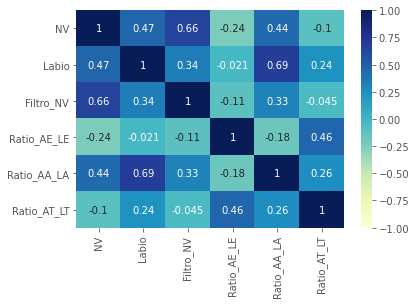

In [12]:
#variables originales del dataset
sns.heatmap(data.iloc[8:,8:].corr(), vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)

C:\Users\maela\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


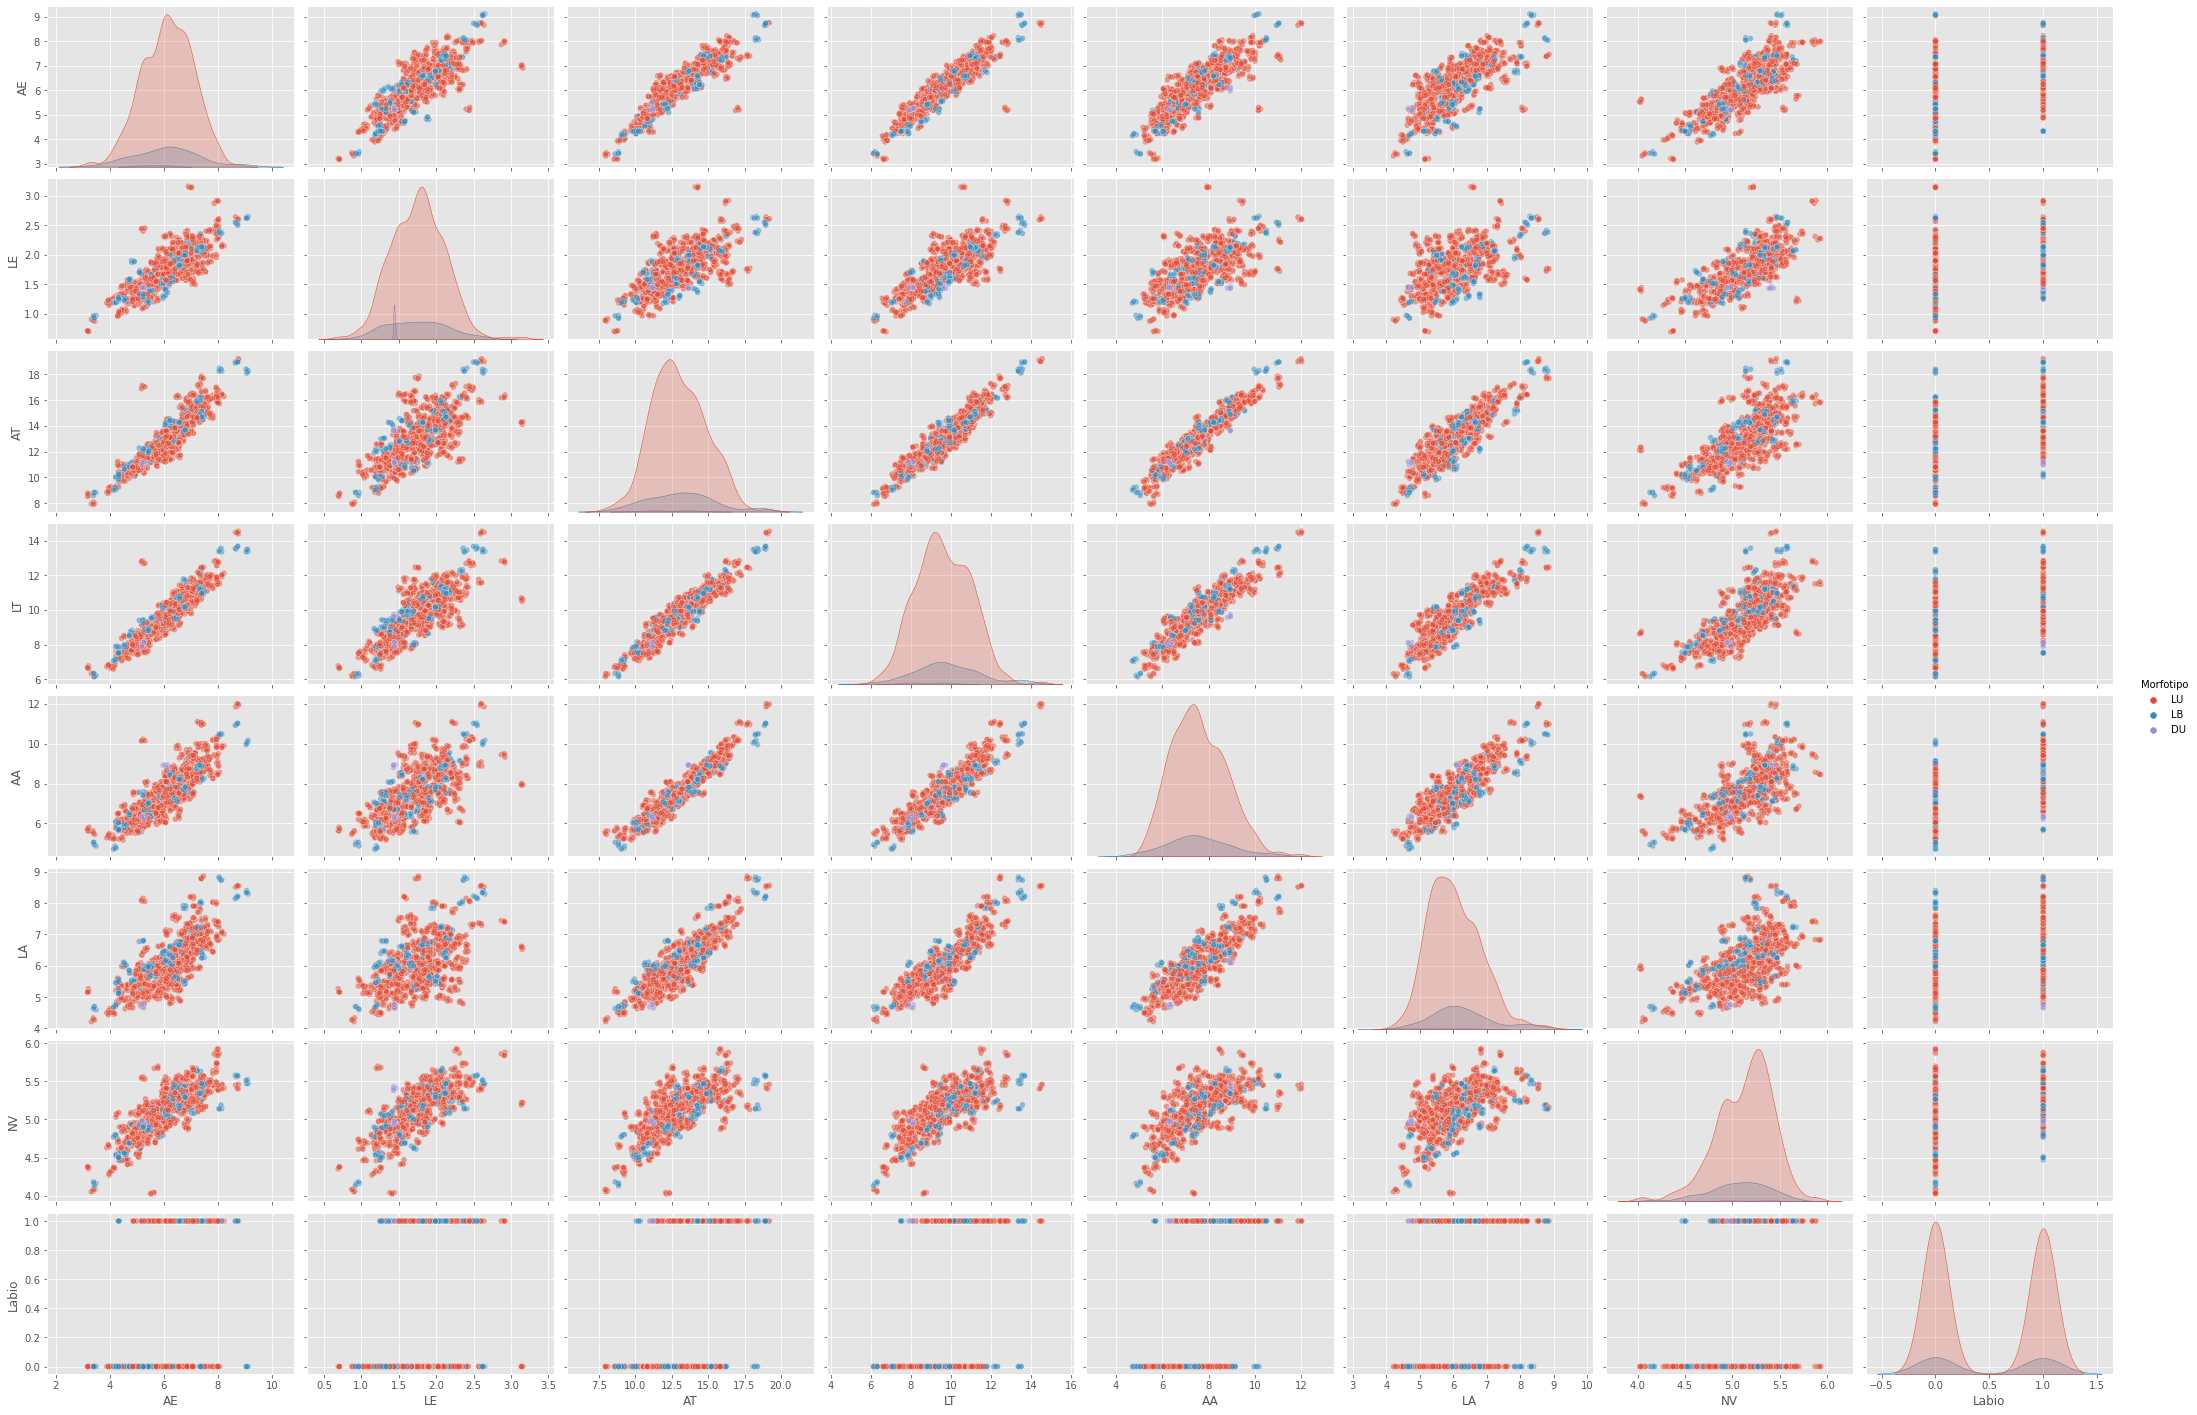

In [13]:
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5);

C:\Users\maela\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


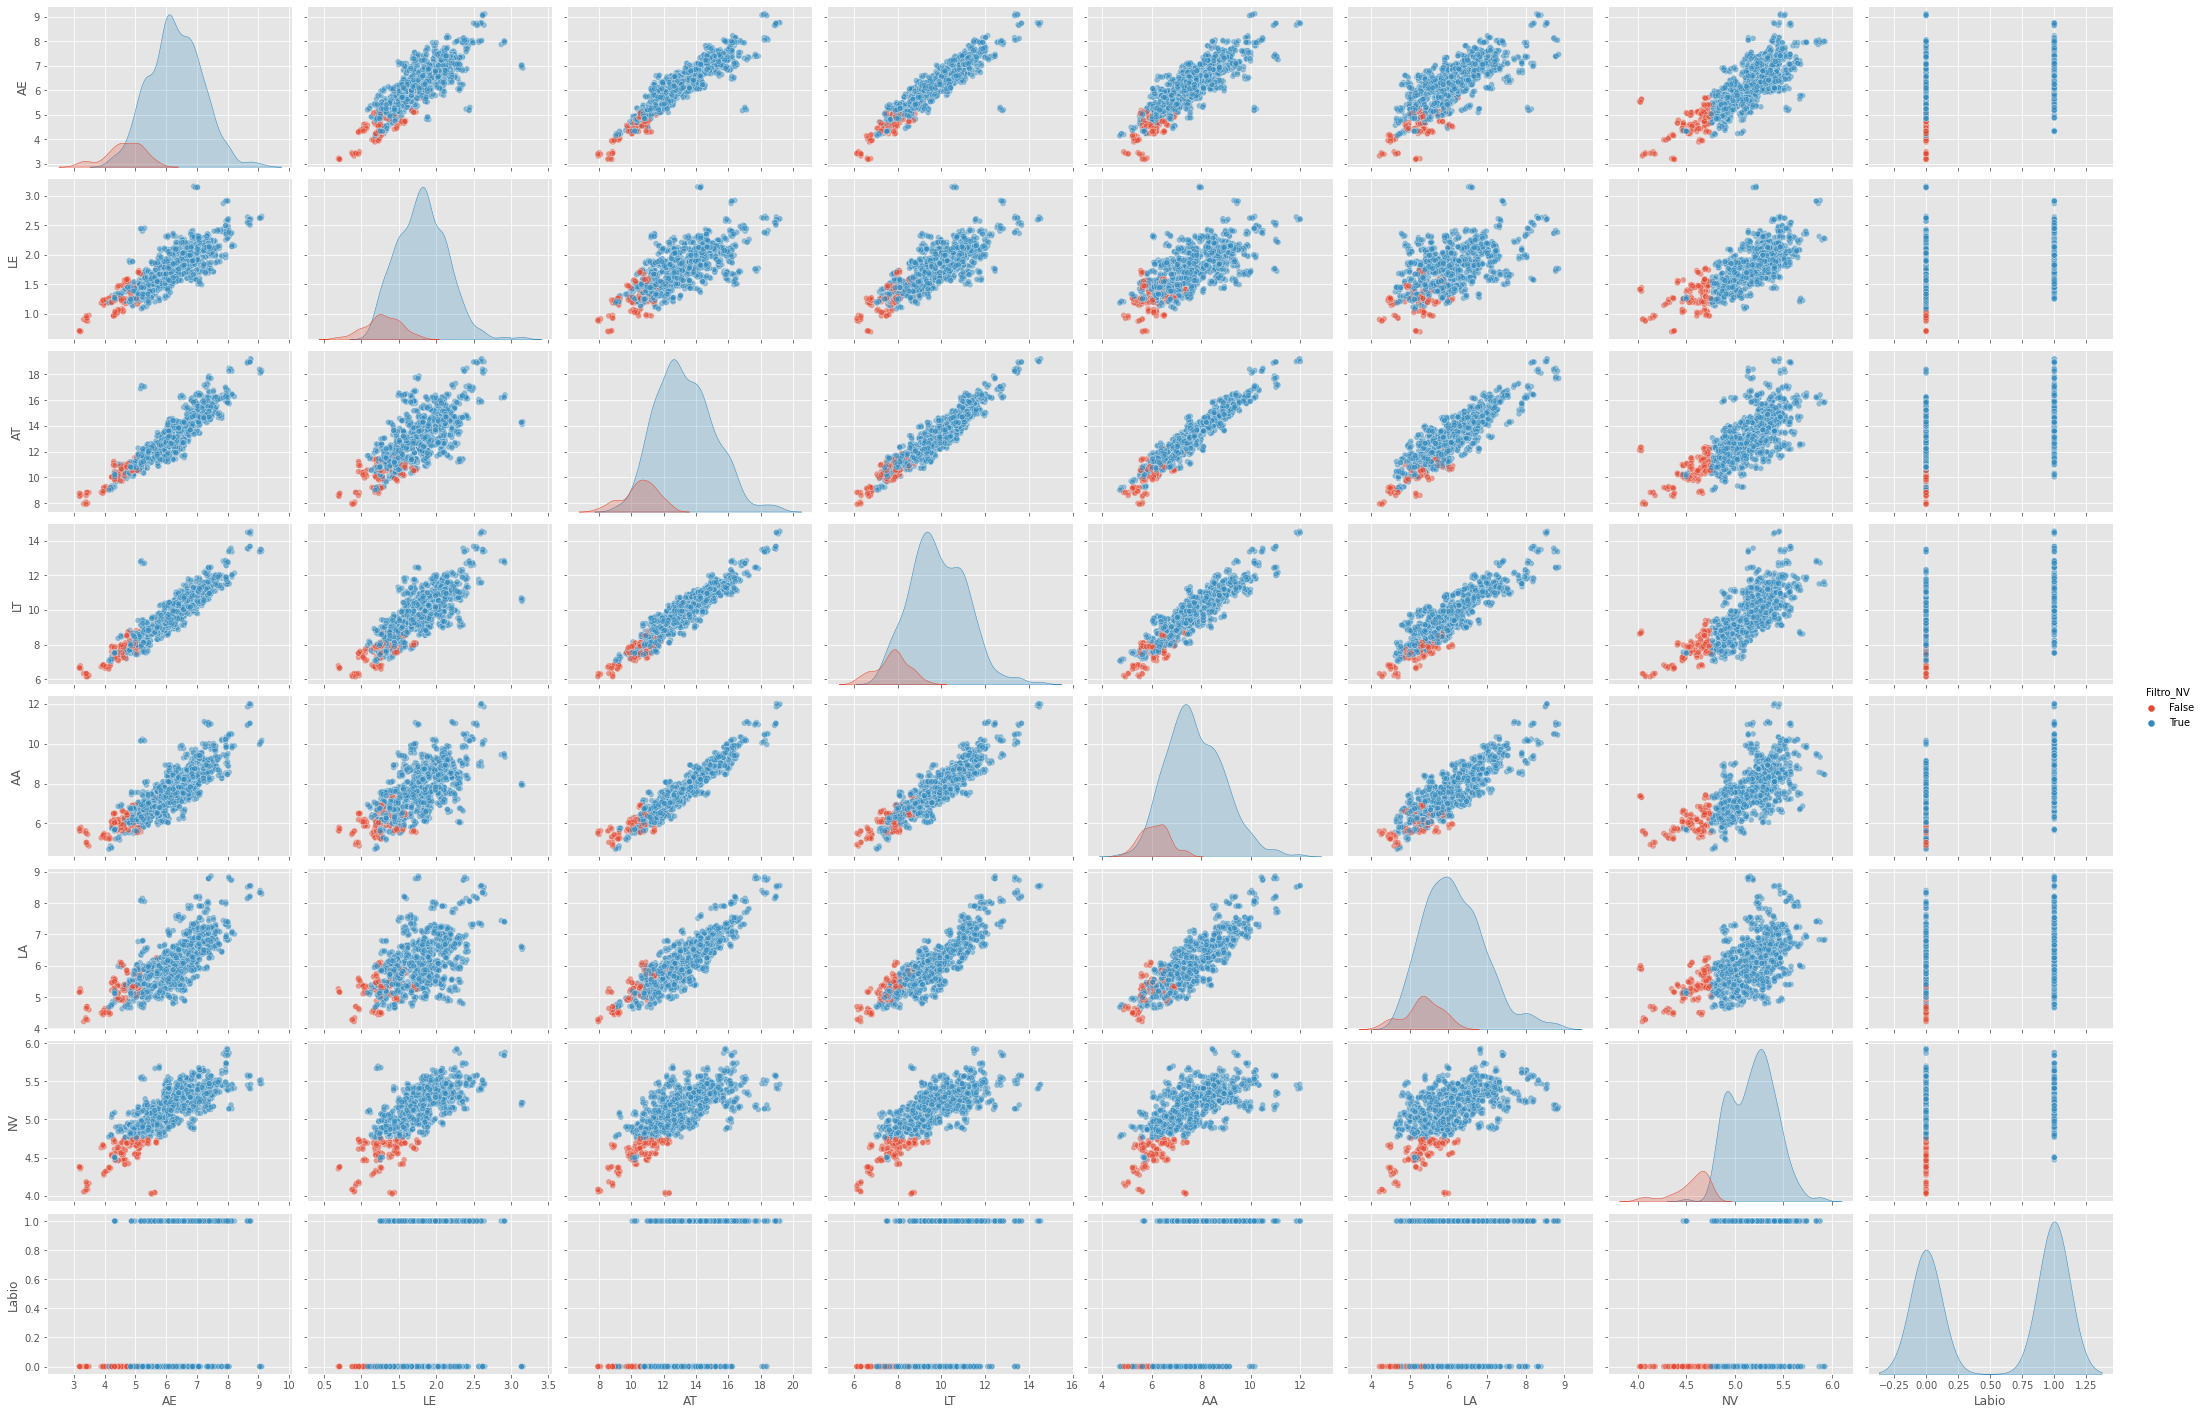

In [14]:
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],hue='Filtro_NV',plot_kws={'alpha': 0.5},aspect=1.5);

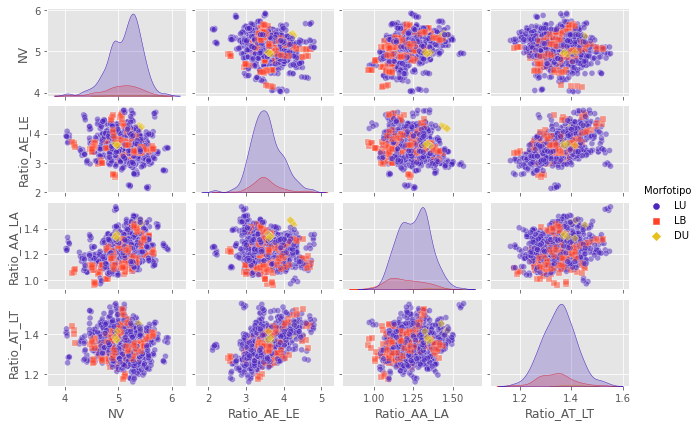

In [15]:
sns.pairplot(data=data,x_vars=['NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT'],\
         y_vars=['NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT'],\
             hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5, markers=['o','s','D'],palette='CMRmap', height=1.5);

### Distribución de las observaciones

In [16]:
def distribution_plotter(data, label, bins="auto"):    
    plt.figure(figsize = (10,5))
    sns.set_style("white")    
    dist = sns.histplot(data, bins=bins, stat = "count", kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = 500)    
    dist.set_title('Distribucion ', fontsize = 16)
    plt.xticks(rotation=45, ha='right')

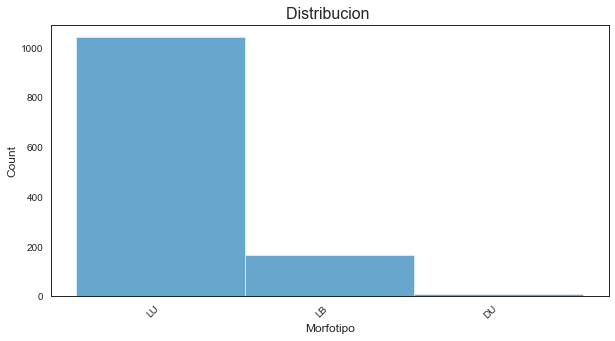

In [17]:
distribution_plotter(data["Morfotipo"],data["Morfotipo"].unique())

In [18]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

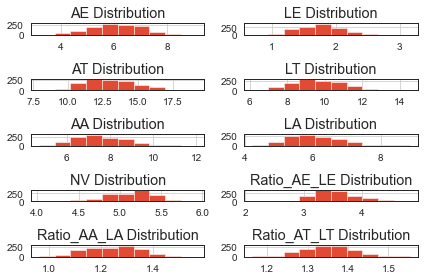

In [19]:
draw_histograms(data, data[["AE","LE","AT","LT","AA","LA","NV","Ratio_AE_LE","Ratio_AA_LA","Ratio_AT_LT"]], 5, 2)

# Modelos de clustering

## Importación modulos y dataset

In [21]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Prueba Kmeans

### Con las variables originales

In [22]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,classification_report,confusion_matrix


In [23]:
x = data[['AE','LE','AT','LT','AA','LA','NV']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_scaled=scaler.fit_transform(x);

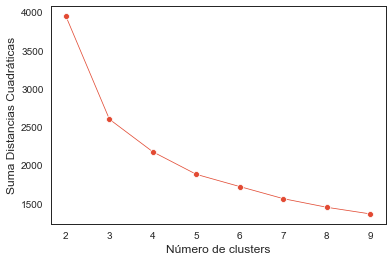

In [24]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

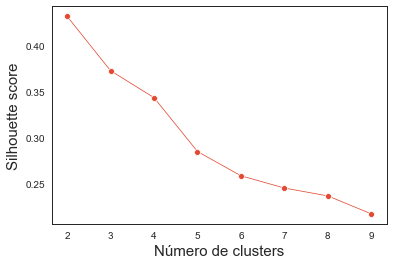

In [25]:
from sklearn.metrics import silhouette_score,silhouette_samples

sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x_scaled)
    score=silhouette_score(x_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

For n_clusters = 2 The average silhouette_score is : 0.4314309031946442
For n_clusters = 3 The average silhouette_score is : 0.3725286484044088
For n_clusters = 4 The average silhouette_score is : 0.34413468088245547
For n_clusters = 5 The average silhouette_score is : 0.2849330327394151
For n_clusters = 6 The average silhouette_score is : 0.25259279279743924
For n_clusters = 7 The average silhouette_score is : 0.24640748404509905
For n_clusters = 8 The average silhouette_score is : 0.2279285747297935
For n_clusters = 9 The average silhouette_score is : 0.22579252647565531


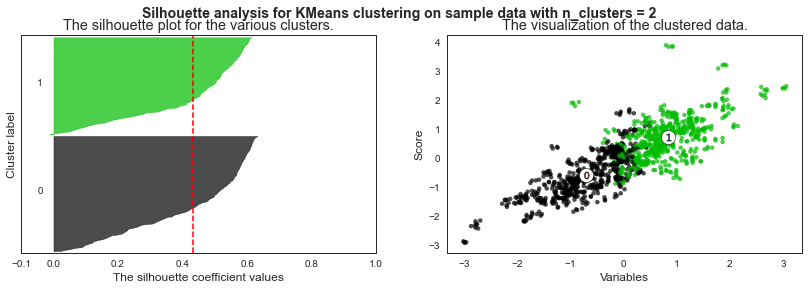

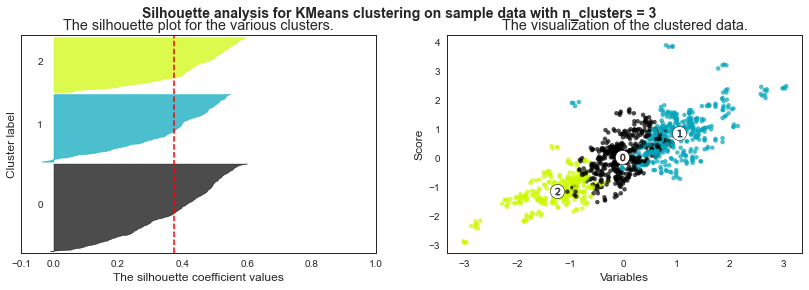

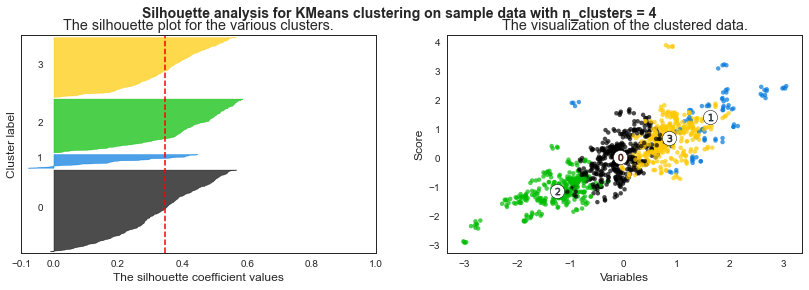

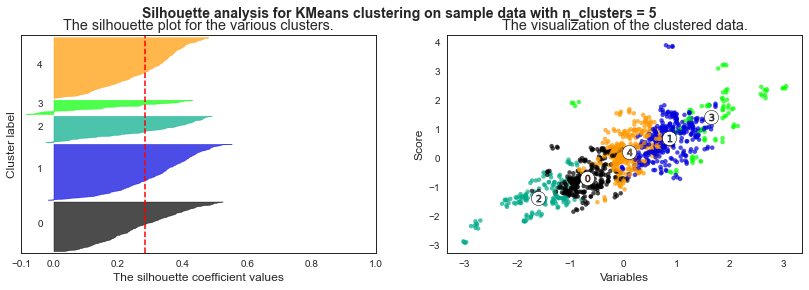

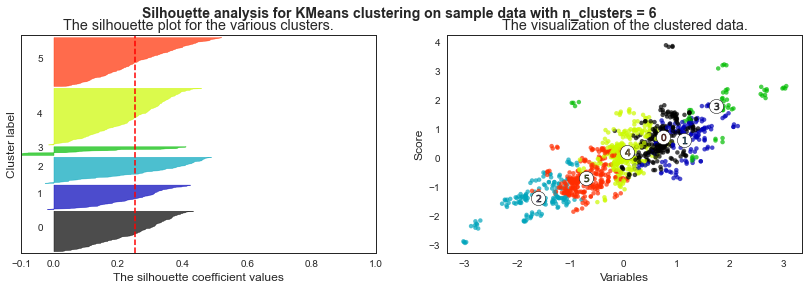

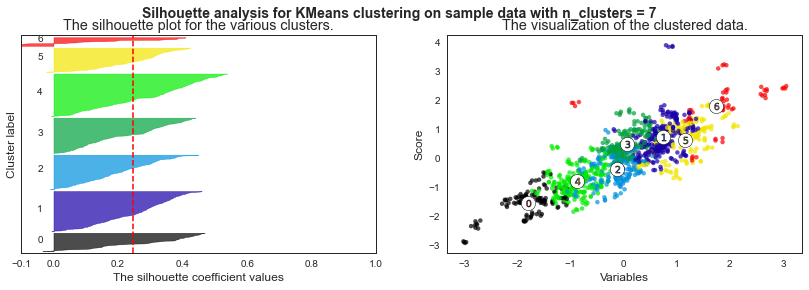

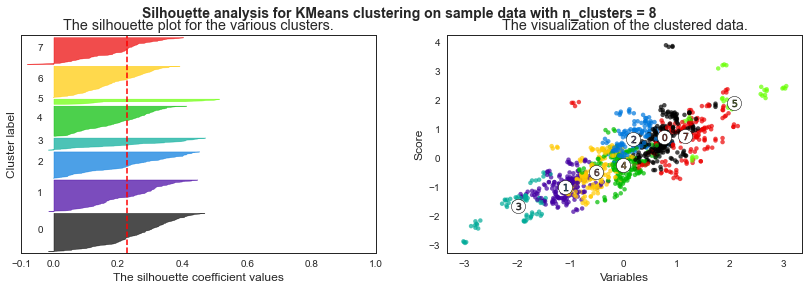

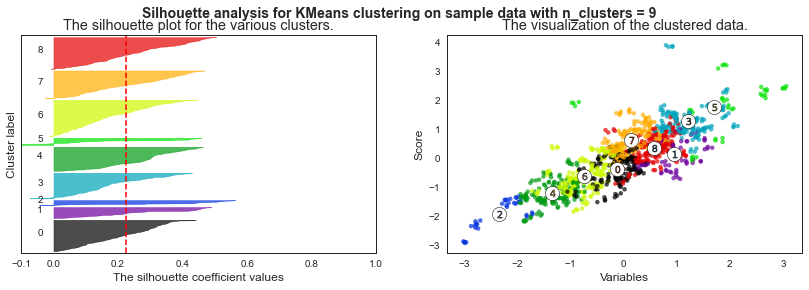

In [26]:
import matplotlib.cm as cm

for n_clusters in range(2,10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 4)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_scaled[:, 0], x_scaled[:, 1], marker='.', s=80, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Variables")
    ax2.set_ylabel("Score")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

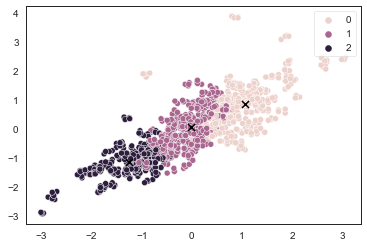

In [27]:
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_scaled[:,0],y=x_scaled[:,1],hue=labels,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans')

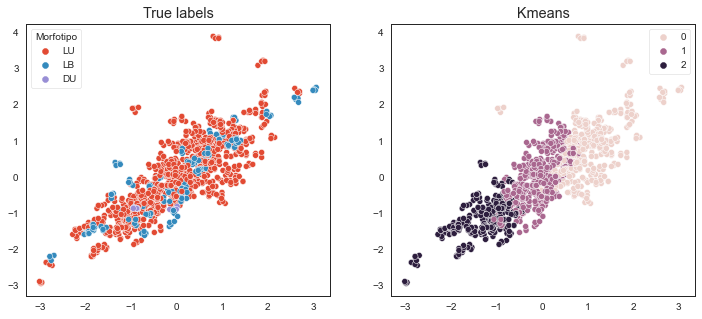

In [28]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=labels,ax=ax[1])
ax[1].set_title('Kmeans')

In [38]:
#sns.heatmap(confusion_matrix(y_true,labels),annot=True,cmap='Blues',fmt=".0f");

#print(classification_report(y_true,labels))

### Con todas las variables (menos Labio y Filtro_NV)

In [29]:
x_R = data[['AE','LE','AT','LT','AA','LA','NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT']]
#x_R = data[['NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_R_scaled=scaler.fit_transform(x_R);

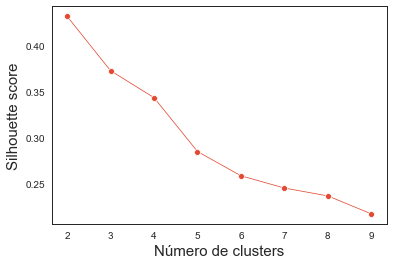

In [30]:
from sklearn.metrics import silhouette_score,silhouette_samples

sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x_scaled)
    score=silhouette_score(x_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

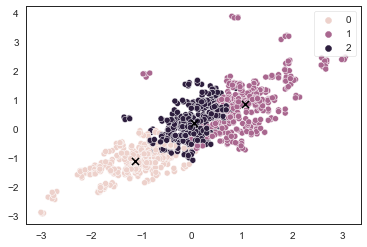

In [31]:
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_R_scaled)

labels_R = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids_R = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_R_scaled[:,0],y=x_R_scaled[:,1],hue=labels_R,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids_R[:,0],centroids_R[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans_R')

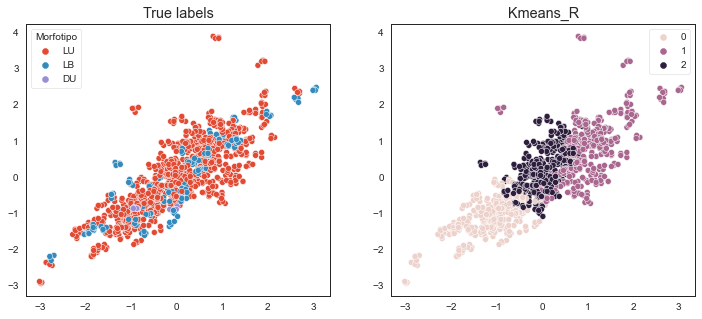

In [32]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=labels_R,ax=ax[1])
ax[1].set_title('Kmeans_R')

## DBSCAN

In [33]:
from scipy.spatial.distance import pdist,squareform

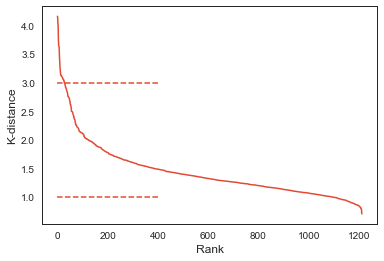

In [34]:
minPts=20;
k=minPts-1;

D=squareform(pdist(x_R_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([1,3],0,400,linestyles='dashed');

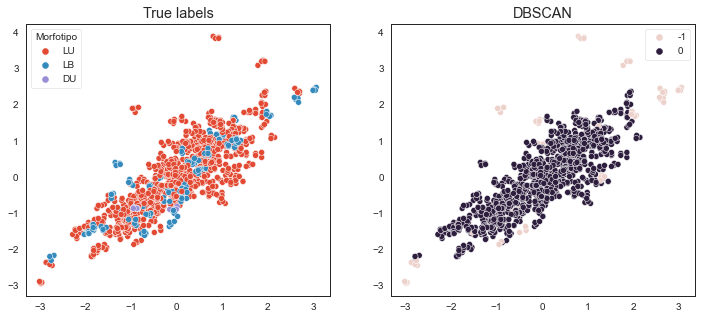

In [35]:
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x_R_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=labels_db,ax=ax[1])
ax[1].set_title('DBSCAN');

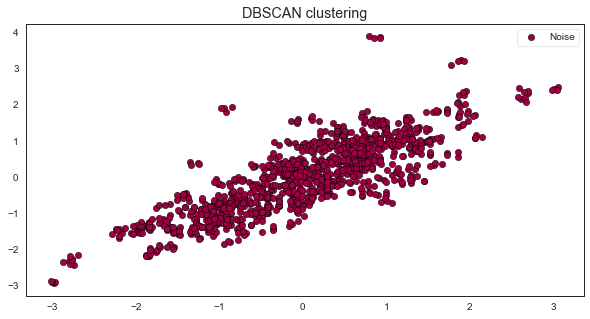

In [36]:
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x_R_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x_R_scaled[labels==l,0], x_R_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x_R_scaled[labels==l,0], x_R_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');
    

# Modelos reducción dimensionalidad

## Prueba PCA

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [38]:
std_sclr = StandardScaler()

X = data[['AE','LE','AT','LT','AA','LA','NV','Filtro_NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT']]

data_std = pd.DataFrame(std_sclr.fit_transform(X))

In [39]:
model = PCA()

In [40]:
model_pca = model.fit(data_std)

### Bastón quebrado

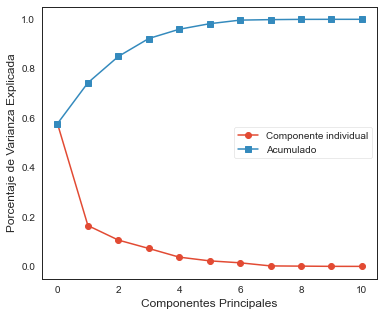

In [41]:
plt.figure(figsize=(6,5))

plt.plot(model_pca.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(model_pca.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

In [42]:
#tabla de como aporta cada feature al componente
pca_df = pd.DataFrame(model_pca.components_, index =['AE','LE','AT','LT','AA','LA','NV','Filtro_NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT'], \
                      columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11'])
pca_df

PC1       PC2       PC3       PC4       PC5       PC6  \
AE           0.378812  0.335473  0.376440  0.383962  0.367828  0.320662   
LE           0.026493 -0.331657  0.196884  0.013316  0.188320  0.203851   
AT          -0.031479  0.055893 -0.064937 -0.197154 -0.014145 -0.444221   
LT           0.004181  0.195695  0.119752  0.073791  0.166861  0.066115   
AA           0.018900  0.247161  0.103628 -0.089845 -0.213732  0.057960   
LA           0.308796  0.123440 -0.053875 -0.061574 -0.289311 -0.266000   
NV          -0.594004 -0.293348 -0.053210 -0.087495  0.256330  0.292493   
Filtro_NV   -0.236149 -0.312690  0.545000  0.557054 -0.304122 -0.367729   
Ratio_AE_LE -0.591125  0.687512  0.033256  0.119456 -0.068520 -0.027590   
Ratio_AA_LA  0.021264 -0.039318 -0.101884  0.104859 -0.703917  0.592348   
Ratio_AT_LT  0.024299 -0.040848 -0.689919  0.673044  0.115861 -0.085949   

                  PC7       PC8       PC9      PC10      PC11  
AE           0.337698  0.232839 -0.084763  0.203135 -0.000903  
LE          -0.123559 -0.090240  0.643069  0.025255  0.579444  
AT           0.096986  0.221154 -0.149905  0.710789  0.411410  
LT          -0.304370 -0.806593 -0.323263  0.197427  0.151580  
AA          -0.021615  0.189633 -0.395797 -0.513842  0.643107  
LA           0.672953 -0.436993  0.248624 -0.133509  0.069201  
NV           0.561217 -0.103701 -0.258255  0.008777  0.082889  
Filtro_NV    0.011424 -0.012516 -0.100067 -0.021463 -0.025473  
Ratio_AE_LE -0.014277  0.014473  0.395323  0.019235 -0.001889  
Ratio_AA_LA -0.000492 -0.009318 -0.020563  0.358515  0.034754  
Ratio_AT_LT -0.003634  0.003265 -0.020638 -0.050993  0.211905

### Proyección

In [43]:
#nuevo dataset con cada participación de feature
nuevo_data_pca = pd.DataFrame(model_pca.fit_transform(data_std), index =X.index,\
                              columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11'])

In [44]:
nuevo_data_pca.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.784141 -0.170162  0.766379  0.179627 -0.207112 -0.403989  0.109587   
1  0.818754 -0.152809  0.616662  0.220726 -0.167990 -0.523326  0.107136   
2  0.760093 -0.040865  0.662419  0.227664 -0.187555 -0.574422  0.105425   
3  0.811014  0.119493  0.697740  0.277854  0.023494 -0.553148  0.053067   
4  0.158650 -2.502394  1.343508 -0.373625 -0.212998  1.153688 -0.270590   
5  0.205181 -2.838789  1.344064 -0.333621 -0.557781  1.045228 -0.351919   
6  0.202246 -2.533176  1.397006 -0.315697 -0.352251  1.024521 -0.190806   
7  0.278444 -2.577445  1.502620 -0.292718 -0.697520  0.980967 -0.392650   
8  1.566963 -0.644888  0.718814  0.322363 -0.178455 -0.036625 -0.399757   
9  1.618650 -0.796253  0.625546  0.322037 -0.408831 -0.120703 -0.415703   

        PC8       PC9      PC10      PC11  
0  0.120672 -0.021022  0.000961  0.003477  
1  0.131225 -0.018013 -0.001988  0.005281  
2  0.086863 -0.026202 -0.002422  0.005460  
3  0.164145 -0.017848 -0.002001 -0.000308  
4 -0.131145  0.041284  0.027401 -0.035435  
5 -0.156274  0.063457  0.040845 -0.036854  
6 -0.151046  0.042908  0.035670 -0.034245  
7 -0.075630  0.050828  0.059707 -0.032781  
8 -0.090297 -0.013614 -0.007396  0.001565  
9 -0.075471 -0.005810 -0.007894  0.010675

In [45]:
nuevo_data_pca.shape

(1212, 11)

### Pesos (loadings)

In [46]:
# me quedo con los primeros 5 componentes
pca_loadings = pd.DataFrame(model_pca.components_.T, index=X.columns).iloc[:,:4]
pca_loadings.rename(columns = {0 : 'CP1', 1 : 'CP2', 2 : 'CP3', 3 : 'CP4'}, inplace = True)
pca_loadings

CP1       CP2       CP3       CP4
AE           0.378812  0.026493 -0.031479  0.004181
LE           0.335473 -0.331657  0.055893  0.195695
AT           0.376440  0.196884 -0.064937  0.119752
LT           0.383962  0.013316 -0.197154  0.073791
AA           0.367828  0.188320 -0.014145  0.166861
LA           0.320662  0.203851 -0.444221  0.066115
NV           0.337698 -0.123559  0.096986 -0.304370
Filtro_NV    0.232839 -0.090240  0.221154 -0.806593
Ratio_AE_LE -0.084763  0.643069 -0.149905 -0.323263
Ratio_AA_LA  0.203135  0.025255  0.710789  0.197427
Ratio_AT_LT -0.000903  0.579444  0.411410  0.151580

In [47]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

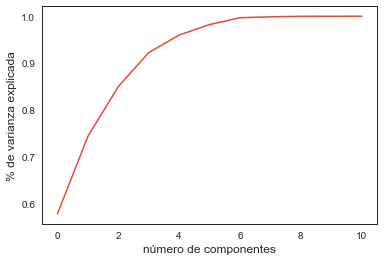

In [49]:
plot_explained_variance(components_count = 11, X = data_std)

## Prueba TSNE

In [50]:
from sklearn.manifold import TSNE

In [51]:
tsne = TSNE(random_state=42)

proj_tsne = tsne.fit_transform(data_std)

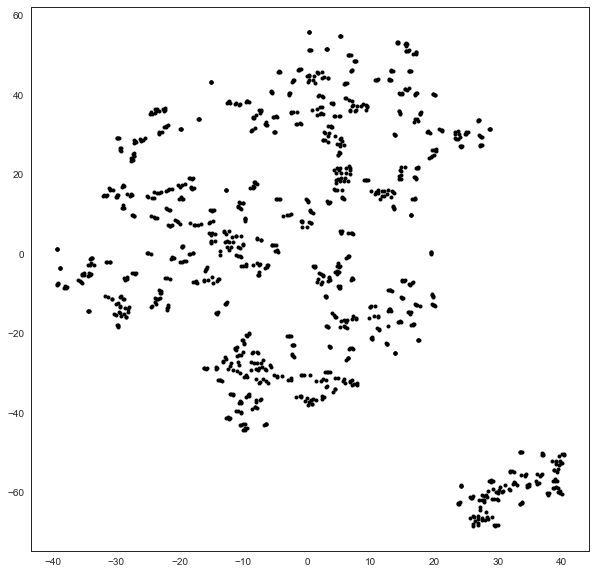

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))

# get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
ax = ax or plt.gca()
    
coord_x = proj_tsne[:, 0]
coord_y = proj_tsne[:, 1]
ax.plot(coord_x, coord_y, '.k')    

# Modelos clasificación

## CART con oversampling

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
newX = data[['AE','LE','AT','LT','AA','LA','NV','Labio','Filtro_NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT']]
newy = data['Morfotipo']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(newX,newy,stratify = data['Morfotipo'],random_state=0)

In [56]:
# chequeamos la presencia relativa de cada clase y el tamaño de los datasets
print('Entrenamiento:',X_train.shape)
print('Testeo:',X_test.shape)
print('\nClases train:')
print(y_train.value_counts(normalize=True))
print('\nClases test:')
print(y_test.value_counts(normalize=True))

Entrenamiento: (909, 12)
Testeo: (303, 12)

Clases train:
LU    0.858086
LB    0.135314
DU    0.006601
Name: Morfotipo, dtype: float64

Clases test:
LU    0.858086
LB    0.135314
DU    0.006601
Name: Morfotipo, dtype: float64


### OverSampling

In [57]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
LU    780
DU    780
LB    123
Name: Morfotipo, dtype: int64

Composición del test set:
LU    260
LB     41
DU      2
Name: Morfotipo, dtype: int64


In [58]:
X_train_os2,y_train_os2=oversampler.fit_resample(X_train_os,y_train_os);

print('Composición del training set:')
print(y_train_os2.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
LU    780
DU    780
LB    780
Name: Morfotipo, dtype: int64

Composición del test set:
LU    260
LB     41
DU      2
Name: Morfotipo, dtype: int64


## CART

In [59]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix

In [65]:
clf_dt = DecisionTreeClassifier(max_depth = 7, random_state=42)
clf_dt = clf_dt.fit(X_train_os2,y_train_os2)

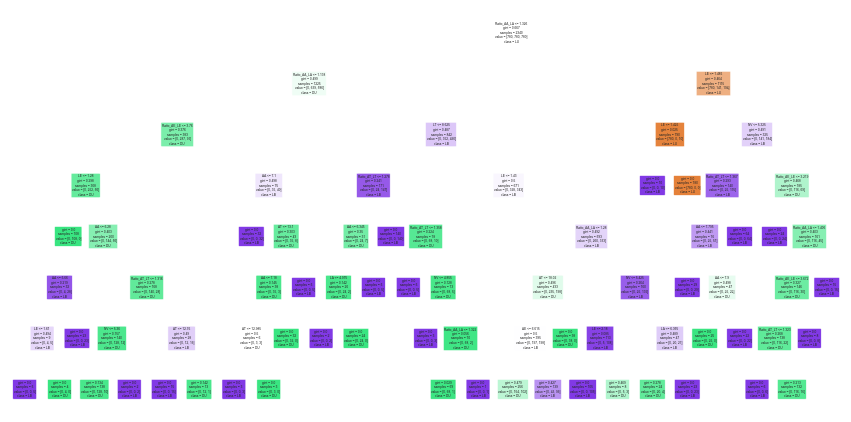

In [66]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["LU","DU", "LB"], 
          feature_names=X_train_os2.columns); 

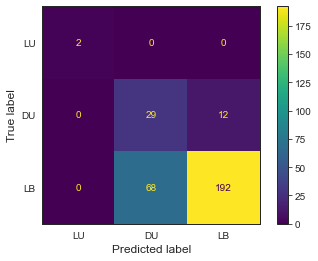

In [67]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["LU","DU","LB"])